In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
import seaborn as sns #for graphics and figure styling

# **Housing Dataset**

Dataset from: https://www.kaggle.com/datasets/rukenmissonnier/final-house

Dataset details

* **Bedroom Count:** This attribute represents the number of bedrooms in the housing unit, providing insights into its size and capacity.

* **Net Square Meters (Net Sqm):** Net square meters refer to the total usable interior space within the housing unit, excluding common areas like corridors and stairwells. It quantifies the size of the property.

* **Center Distance:** This attribute measures the distance of the housing unit from the central or downtown area of a city or town. It is a valuable metric for potential buyers or renters to assess proximity to urban amenities and activities.

* **Metro Distance:** Metro distance indicates the distance between the housing unit and the nearest metro or subway station. This information is particularly useful for individuals who rely on public transportation for their daily commute.

* **Floor:** The floor attribute specifies the level or story of the housing unit within the building, offering insights into its placement and accessibility within the structure.

* **Age:** The age of the property represents the number of years since its construction or renovation. It plays a crucial role in assessing the condition of the property and potential maintenance requirements.

* **Price:** Price is the cost associated with purchasing or renting the housing unit. It is a fundamental factor for individuals making housing decisions and can be influenced by various attributes such as bedroom count, size, location, and age.

In [ ]:
data = pd.read_csv("house.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [ ]:
data.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price,bedroom_count:net_sqm,center_distance:metro_distance
0,1,26.184098,1286.68,204.003817,22,67,96004.804557,26.184098,12.477959
1,1,34.866901,1855.25,186.980360,8,30,92473.722568,34.866901,12.756778
2,1,36.980709,692.09,111.224999,24,24,98112.519942,36.980709,11.251271
3,1,17.445723,1399.49,237.998760,1,66,92118.326874,17.445723,12.716129
4,1,52.587646,84.65,100.996400,20,3,98976.653176,52.587646,9.053610


# Correlation plot:


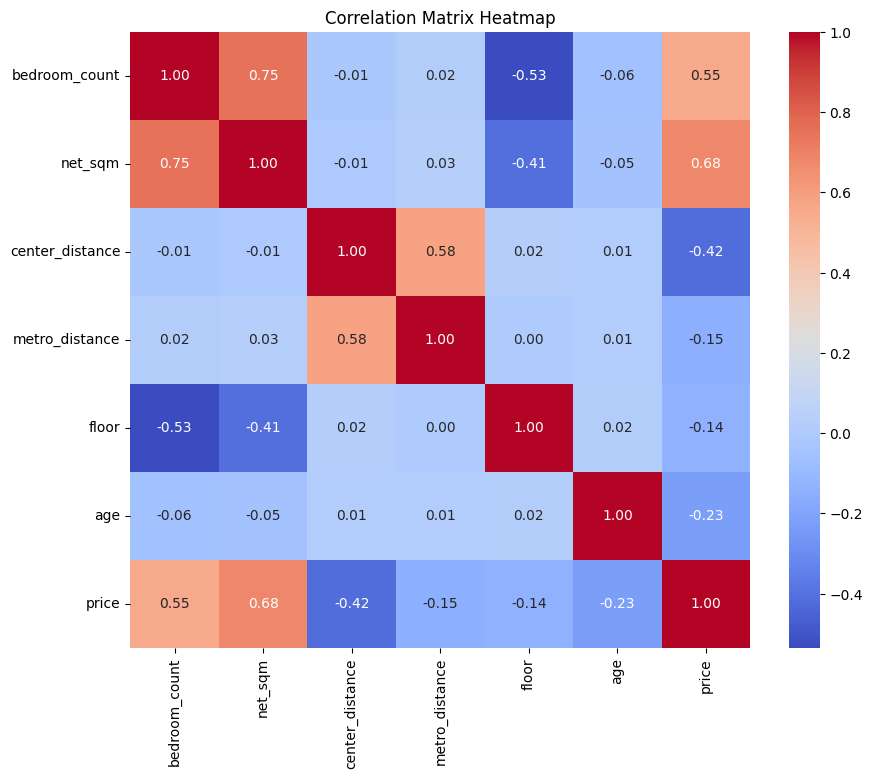

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.savefig('Correlation_Heatmap.png')
plt.show()

# Model fit summary:

In [ ]:
m1 = smf.ols("price ~ bedroom_count * net_sqm + center_distance * metro_distance + floor + age", data)
m1_fit = m1.fit()
print(m1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1385.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:04:51   Log-Likelihood:                -39010.
No. Observations:                4308   AIC:                         7.804e+04
Df Residuals:                    4299   BIC:                         7.810e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_table = anova_lm(m1_fit)
print(anova_table)

                                    df        sum_sq       mean_sq  \
bedroom_count                      1.0  2.019404e+10  2.019404e+10   
net_sqm                            1.0  1.081305e+10  1.081305e+10   
bedroom_count:net_sqm              1.0  5.198251e+05  5.198251e+05   
center_distance                    1.0  1.120426e+10  1.120426e+10   
metro_distance                     1.0  5.172928e+08  5.172928e+08   
center_distance:metro_distance     1.0  1.021882e+08  1.021882e+08   
floor                              1.0  2.631182e+09  2.631182e+09   
age                                1.0  2.216546e+09  2.216546e+09   
Residual                        4299.0  1.849806e+10  4.302876e+06   

                                          F         PR(>F)  
bedroom_count                   4693.148958   0.000000e+00  
net_sqm                         2512.981826   0.000000e+00  
bedroom_count:net_sqm              0.120809   7.281760e-01  
center_distance                 2603.901298   0.000000e

# Plot of fitting model

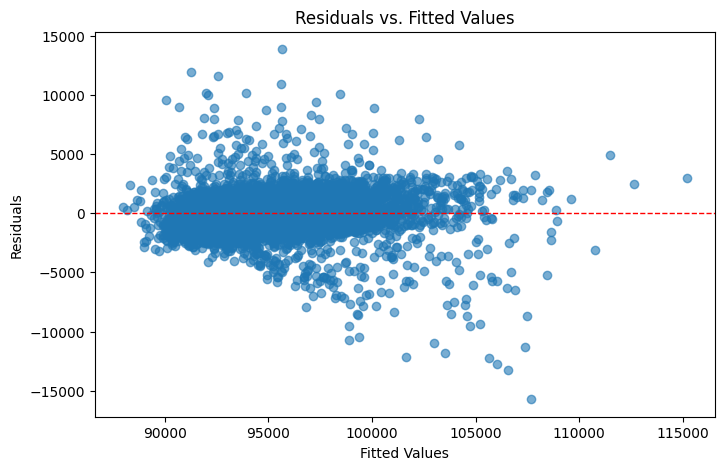

In [ ]:
# Residuals vs. Fitted Plot
fitted_values = m1_fit.fittedvalues
residuals = m1_fit.resid

plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.savefig("Residuals_vs_FittedValues.png")
plt.show()

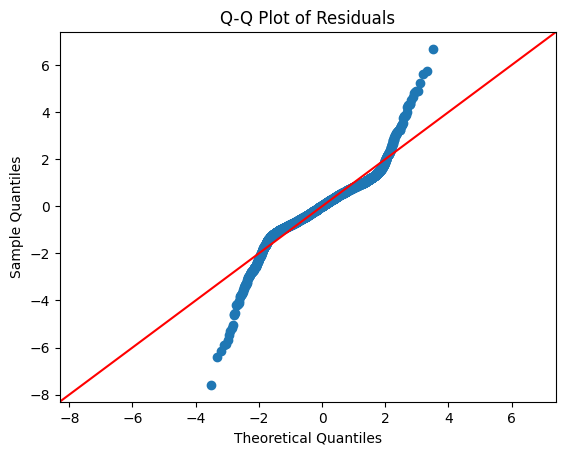

In [ ]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.savefig("QQPlot.png")
plt.show()

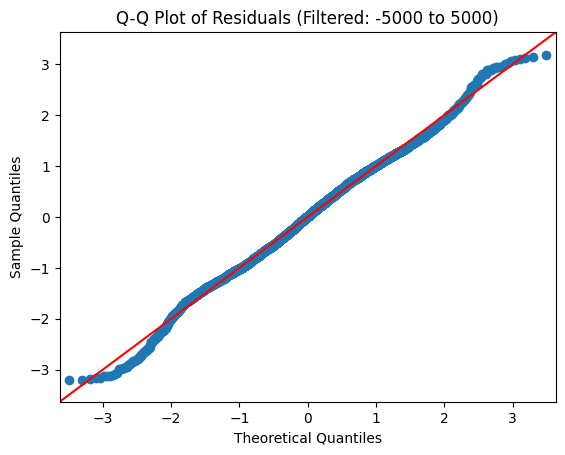

In [ ]:
# Filter residuals between -5000 and 5000
filtered_residuals = residuals[(residuals > -5000) & (residuals < 5000)]

# Generate Q-Q Plot for filtered residuals
sm.qqplot(filtered_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Filtered: -5000 to 5000)")
plt.savefig("QQPlot(filtered).png")
plt.show()

# Linear Regression

In [ ]:
data['bedroom_count:net_sqm'] = data['bedroom_count'] * data['net_sqm']
data['center_distance:metro_distance'] = np.log(data['center_distance'] * data['metro_distance'])

data.head(5)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price,bedroom_count:net_sqm,center_distance:metro_distance
0,1,26.184098,1286.68,204.003817,22,67,96004.804557,26.184098,12.477959
1,1,34.866901,1855.25,186.980360,8,30,92473.722568,34.866901,12.756778
2,1,36.980709,692.09,111.224999,24,24,98112.519942,36.980709,11.251271
3,1,17.445723,1399.49,237.998760,1,66,92118.326874,17.445723,12.716129
4,1,52.587646,84.65,100.996400,20,3,98976.653176,52.587646,9.053610


In [ ]:
Y = data["price"]
X = data.drop(columns=["price"])

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.8, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((3446, 8), (3446,))

In [ ]:
# Create an instance of ordinary linear regression model in sklearn.linear_model module
model = linear_model.LinearRegression()
# Fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 4028009.72
R^2 Score: 0.73


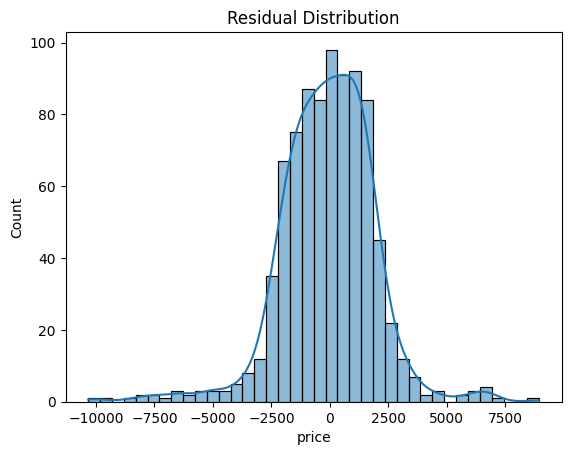

In [ ]:
actual_values = y_test
predicted_values = model.predict(X_test)

residuals = actual_values - predicted_values
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.savefig("Residual_Distribution.png")
plt.show()

In [ ]:
def sse(resid):
    return np.sum(resid**2)

In [ ]:
# compute SSE for our training dataset
resid_train = y_train - model.predict(X_train)
resid_train = resid_train[(resid_train > -5000) & (resid_train < 5000)]
sse_train = sse(resid_train)

# compute SSE for our test dataset
resid_test = y_test - model.predict(X_test)
resid_test = resid_test[(resid_test > -5000) & (resid_test < 5000)]
sse_test = sse(resid_test)

print(f"SSE_train: {sse_train:.2f}\nSSE_test: {sse_test:.2f}")

SSE_train: 8067952742.47
SSE_test: 2110979883.58


In [ ]:
print(f"Score of training data: {model.score(X_train, y_train):.4f}\nScore of test data: {model.score(X_test, y_test):.4f}")

Score of training data: 0.7165
Score of test data: 0.7293


In [ ]:
# Create a function for plotting the residuals and coefficients
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes

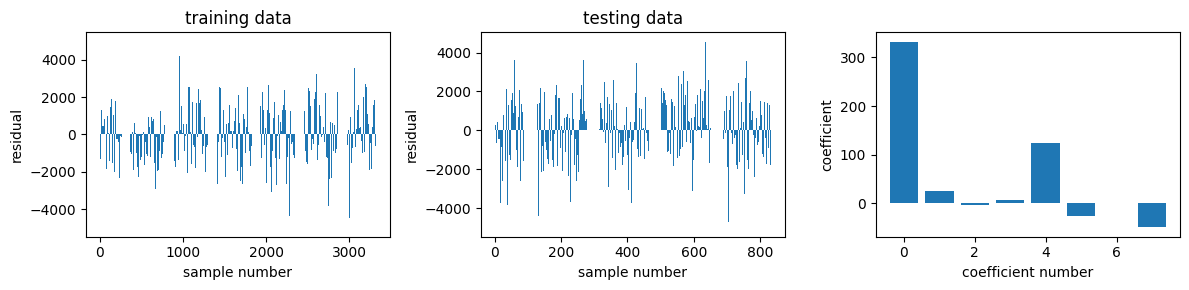

In [ ]:
# Call the function
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)


# Ridge

In [ ]:
# Perform Ridge regression with alpha = 2.5
MRR = linear_model.Ridge(alpha=1000)
MRR.fit(X_train, y_train)

Ridge(alpha=1000)

In [ ]:
# compute SSE for our training dataset
resid_train2 = y_train - MRR.predict(X_train)
sse_train2 = sse(resid_train2)
print("sse_train2: ", sse_train2)

# compute SSE for our test dataset
resid_test2 = y_test - MRR.predict(X_test)
sse_test2 = sse(resid_test2)
print("sse_test2: ", sse_test2)


sse_train2:  15085392989.908932
sse_test2:  3429504881.024777


In [ ]:
# Model score for Ridge
MRR.score(X_train, y_train), MRR.score(X_test, y_test)

(0.7170918462662952, 0.7326599166542399)

# Lasso

In [ ]:
# Perform LASSO regression with alpha = 1.0
ML = linear_model.Lasso(alpha=1000)
ML.fit(X_train, y_train)

Lasso(alpha=1000)

In [ ]:
resid_train3 = y_train - ML.predict(X_train)
sse_train3 = sse(resid_train3)
print("sse_train3: ", sse_train3)

resid_test3 = y_test - ML.predict(X_test)
sse_test3 = sse(resid_test3)
print("sse_test3: ", sse_test3)

sse_train3:  15764815590.091156
sse_test3:  3535823974.319866


In [ ]:
# Model score for Lasso
ML.score(X_train, y_train), ML.score(X_test, y_test)

(0.70435010373754, 0.7243720278047387)

# Analysis

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ",r2)

MSE:  4028009.719006547
r2:  0.7293360413390573


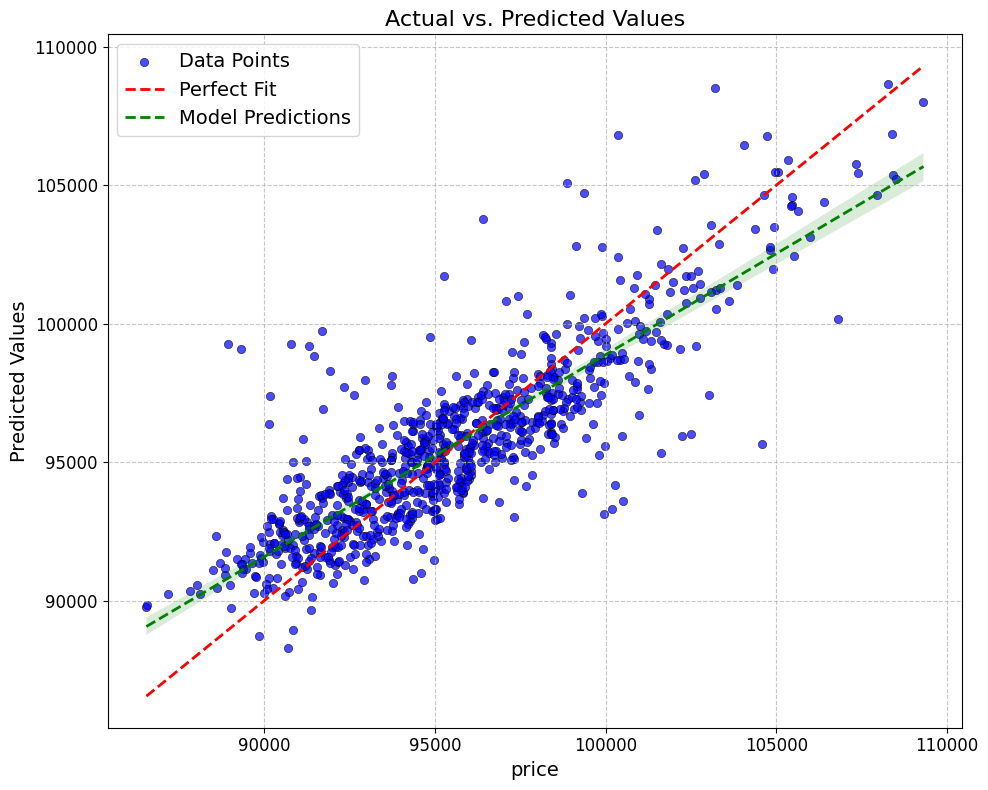

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, edgecolors='k', linewidths=0.5)

# Add a line representing a perfect fit (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
#plt.legend(['Data Points', 'Perfect Fit', 'Model Predictions'], loc='upper left', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', line_kws={"color": "green", "linestyle": "--", "linewidth": 2})
plt.legend(['Data Points', 'Perfect Fit', 'Model Predictions'], loc='upper left', fontsize=14)

plt.tight_layout()
plt.savefig("Actual_VS_Predicted_values.png")
plt.show()